# KMeans, KMeans++, MiniBatchKMeans and KMedios 

### KMeans
+ 目标函数 $SSE= \sum_{i=1}^{i=k}\sum_{j\in C_i}(x_j - \mu_i)^2$
+ 算法流程
  1. 样本集中随机选取$K$个点作为初始聚类中心$C=\{c_1, c_2, ..., c_k\}$;
  2. 计算样本集每个点到$K$个聚类中心距离，将其归类到距离最小的类别上；
  3. 针对每个类别，重新类别中心$c_i = \frac{1}{|C_i|}\sum_{x\in C_i}x$;
  4. 重复2，3步骤，直到$SSE$不再下降。
  
### KMeans++
在初始化聚类中心阶段
  1. 从数据集$\chi$中随机选取一个样本作为聚类中心$c_1$;
  2. 选择一个新中心$c_i$，每个样本$x \in \chi$被选中的概率为$ \frac{D(x)^2}{\sum_{x\in \chi}{D(x)^2}}$, 其中$D(X)$表示x与最近的中心距离，重复选出k个中心；

### MinibtachKMeans
在更新聚类中心时，只抽取一部分样本进行计算。
   

### KMedios
在计算聚类中心时，以中位数或聚类中心最近样本点作为中心，进行更新。
  
## 优劣势
+ K-Means的主要优点有：
  1. 原理比较简单，实现也是很容易，收敛速度快（Mini Batch K-Means）;
  2. 聚类效果较优;
  3. 算法的可解释度比较强;
  4. 主要需要调参的参数仅仅是簇数k。

+ K-Means的主要缺点有：

  1. K值的选取不好把握（肘部法则）；
  2. 对于非凸数据集效果差;
  3. 如果各隐含类别的数据不平衡，比如各隐含类别的数据量严重失衡，或者各隐含类别的方差不同，则聚类效果不佳;、
  5. 对噪音和异常点比较敏感。（改进1：离群点检测的LOF算法，通过去除离群点后再聚类，可以减少离群点和孤立点对于聚类效果的影响；改进2：改成求点的中位数，这种聚类方式即K-Mediods聚类）
  6. 对初始值敏感（初始聚类中心的选择，可以尝试采用二分K-Means算法或K-Means++算法）
  7. 时间复杂度高O(nkt)，其中n是对象总数，k是簇数，t是迭代次数。
  8. 只适用于数值型数据，只能发现球型类簇。

## Reference

- [[1] 聚类算法之K-Means及其变种](https://www.biaodianfu.com/k-means.html)

+ [[2] k-means++: The Advantages of Careful Seeding, David Arthur and Sergei Vassilvitskii, 2017](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)
+ [[3] WIKI: k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B)
+ [[4] 知乎: KMeans算法优缺点](https://www.zhihu.com/question/31296149)
+ [[5] Kernel k-means, Spectral Clustering and Normalized Cuts](http://www.cs.utexas.edu/users/inderjit/public_papers/kdd_spectral_kernelkmeans.pdf)
+ [[6] K-means聚类算法的三种改进(K-means++,ISODATA,Kernel K-means)介绍与对比](https://www.cnblogs.com/yixuan-xu/p/6272208.html)
+ [[7] 核方法和soft SVM](https://blog.csdn.net/liyaohhh/article/details/51026797)
+ [[8] 加权核k均值算法理解及其实现](https://www.cnblogs.com/subaiBlog/p/6271315.html)

## KMeans 效果展示

In [17]:
from sklearn import datasets
circles_x, circles_label = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)
moons_x, moons_label = datasets.make_moons(n_samples=1000, noise=.05)
block_x, block_label = datasets.make_blobs(n_samples=1000)

Convergence in Iterations 11 , SSE  603.83
Convergence in Iterations 11 , SSE  569.56
Convergence in Iterations 11 , SSE  1271.70


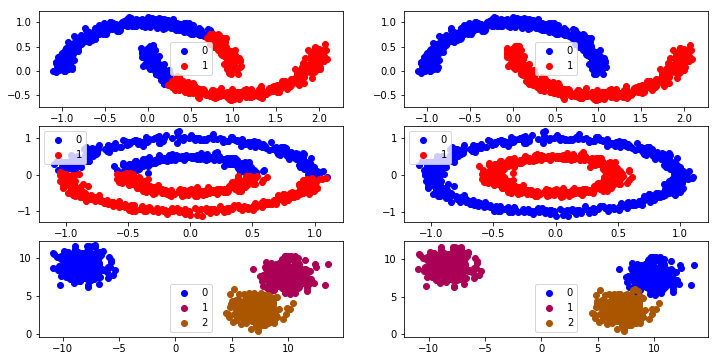

In [22]:
import numpy as np
from sklearn.metrics import euclidean_distances, adjusted_rand_score
from sklearn.cluster import KMeans as sk_KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

from cluster.visual import plot_cluster_2d
from cluster.models.kmeans import KMeans

# kmeans = KMeans(2, verbose=1).fit(moons_x)


f, ax = plt.subplots(3, 2, figsize=(12, 6))
plot_cluster_2d(moons_x, KMeans(2).fit(moons_x).labels, ax[0][0])
plot_cluster_2d(moons_x, moons_label, ax[0][1])
plot_cluster_2d(circles_x, KMeans(2).fit(circles_x).labels, ax[1][0])
plot_cluster_2d(circles_x, circles_label, ax[1][1])
plot_cluster_2d(block_x, KMeans(3).fit(block_x).labels, ax[2][0])
plot_cluster_2d(block_x, block_label, ax[2][1])

In [1]:
import numpy as np

In [4]:
x = np.mat(np.random.rand(3, 4))

In [5]:
x.A

array([[0.02536688, 0.89756975, 0.77833434, 0.91979429],
       [0.23395227, 0.96588773, 0.67478804, 0.19898001],
       [0.16369039, 0.76399806, 0.0420713 , 0.9897675 ]])

In [6]:
x

matrix([[0.02536688, 0.89756975, 0.77833434, 0.91979429],
        [0.23395227, 0.96588773, 0.67478804, 0.19898001],
        [0.16369039, 0.76399806, 0.0420713 , 0.9897675 ]])